### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

/var/folders/rk/3cjh1nsx2nq4f1s4lvbzsp480000gn/T/ipykernel_44944/1247023268.py:39: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Loading the Datasets
* This section will load all of the dataframes into the jupyter notebook and allow us to look at it deeper for analysis.  i will show the head of each dataframe along with the info so that we can see integers versus categorical variables.  This will also show what columns contain missing values

### Loading the TheGeneral dataset

In [2]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)
df_TheGeneral.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,4,1,5086.61,PA0002364104,No fault,C,HAIL,2018-08-06 00:00:00,98,CO,CO,NO,2018-05-29 00:00:00,1,9.0,5086.61,0.0,0.0
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,PG_IVREARENDCV,2018-05-24 00:00:00,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS035ZXBZEH1,2,1,21397.74,PA0002344011,Insured at fault,C,PG_COLLISIONINTERSECTION,2018-06-17 00:00:00,1,CO,CO,NO,2018-05-25 00:00:00,1,53.0,21397.74,0.0,0.0
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348918,No fault,C,HAIL,2018-06-19 00:00:00,98,CO,CO,YES,2018-06-01 00:00:00,2,14.0,0.00,0.0,0.0
4,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348997,No fault,C,GLASSBREAKAGE,2018-06-30 00:00:00,1,CO,CO,NO,2018-06-01 00:00:00,2,1.0,0.00,0.0,0.0


In [3]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

### Loading the MasterQuote dataset

In [4]:
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,NaN,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


In [5]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

### Brief Summary
* The general dataframe has quite a few columns with missing values, this needs to be fixed
* The masterquote dataframe has 1 column with missing values.  This is not super detrimental and can be easily fixed. I will probably delete this column because it does not have much affect on the dataframe as a whole.

## Visualizing Missing Values
* This section will focus on visulaizing the missing values in each dataset. By using a missing value matrix we can see which columns have missing values versus those who don't.  The visualization makes it much easier to assess what columns need to be engiineered

### The General Dataframe

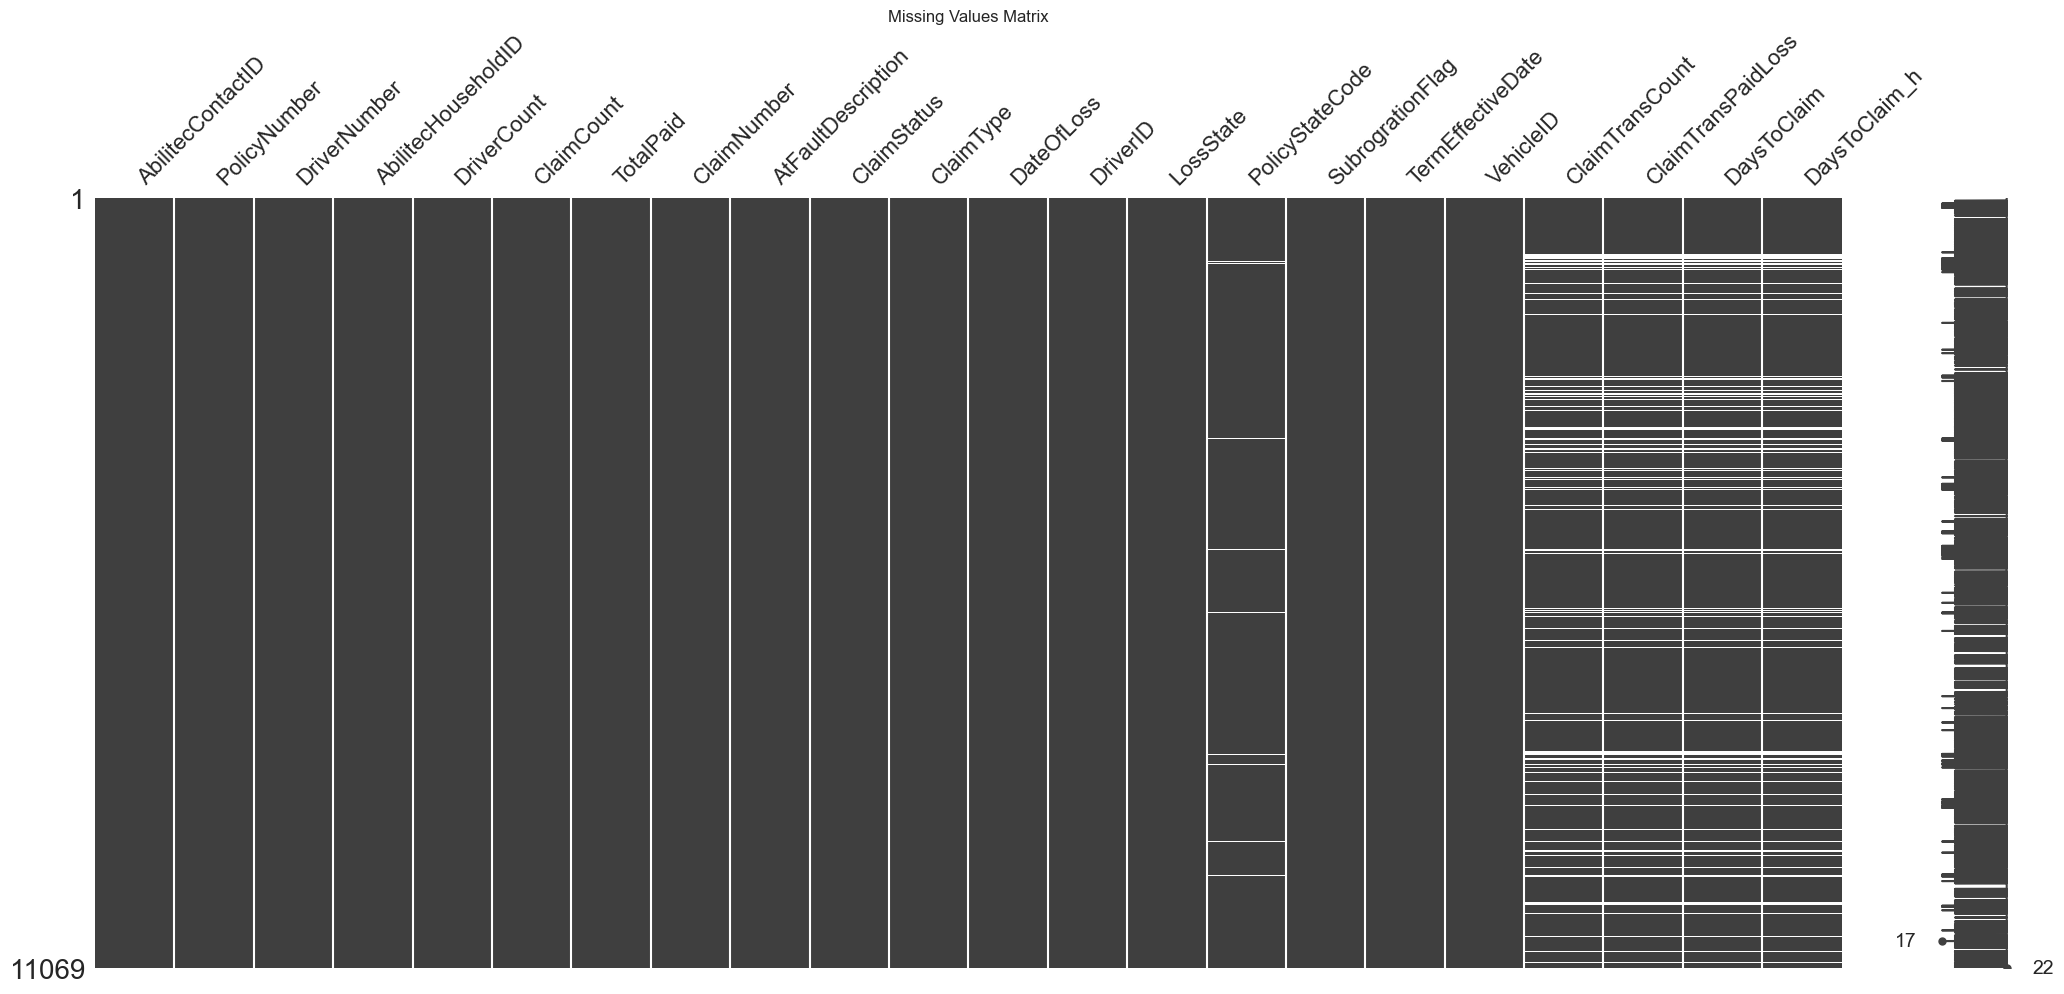

In [8]:
#Visualize missing value matrix for general dataframe
msno.matrix(df_TheGeneral)
plt.title("Missing Values Matrix")
plt.show()

### MasterQuote Dataframe

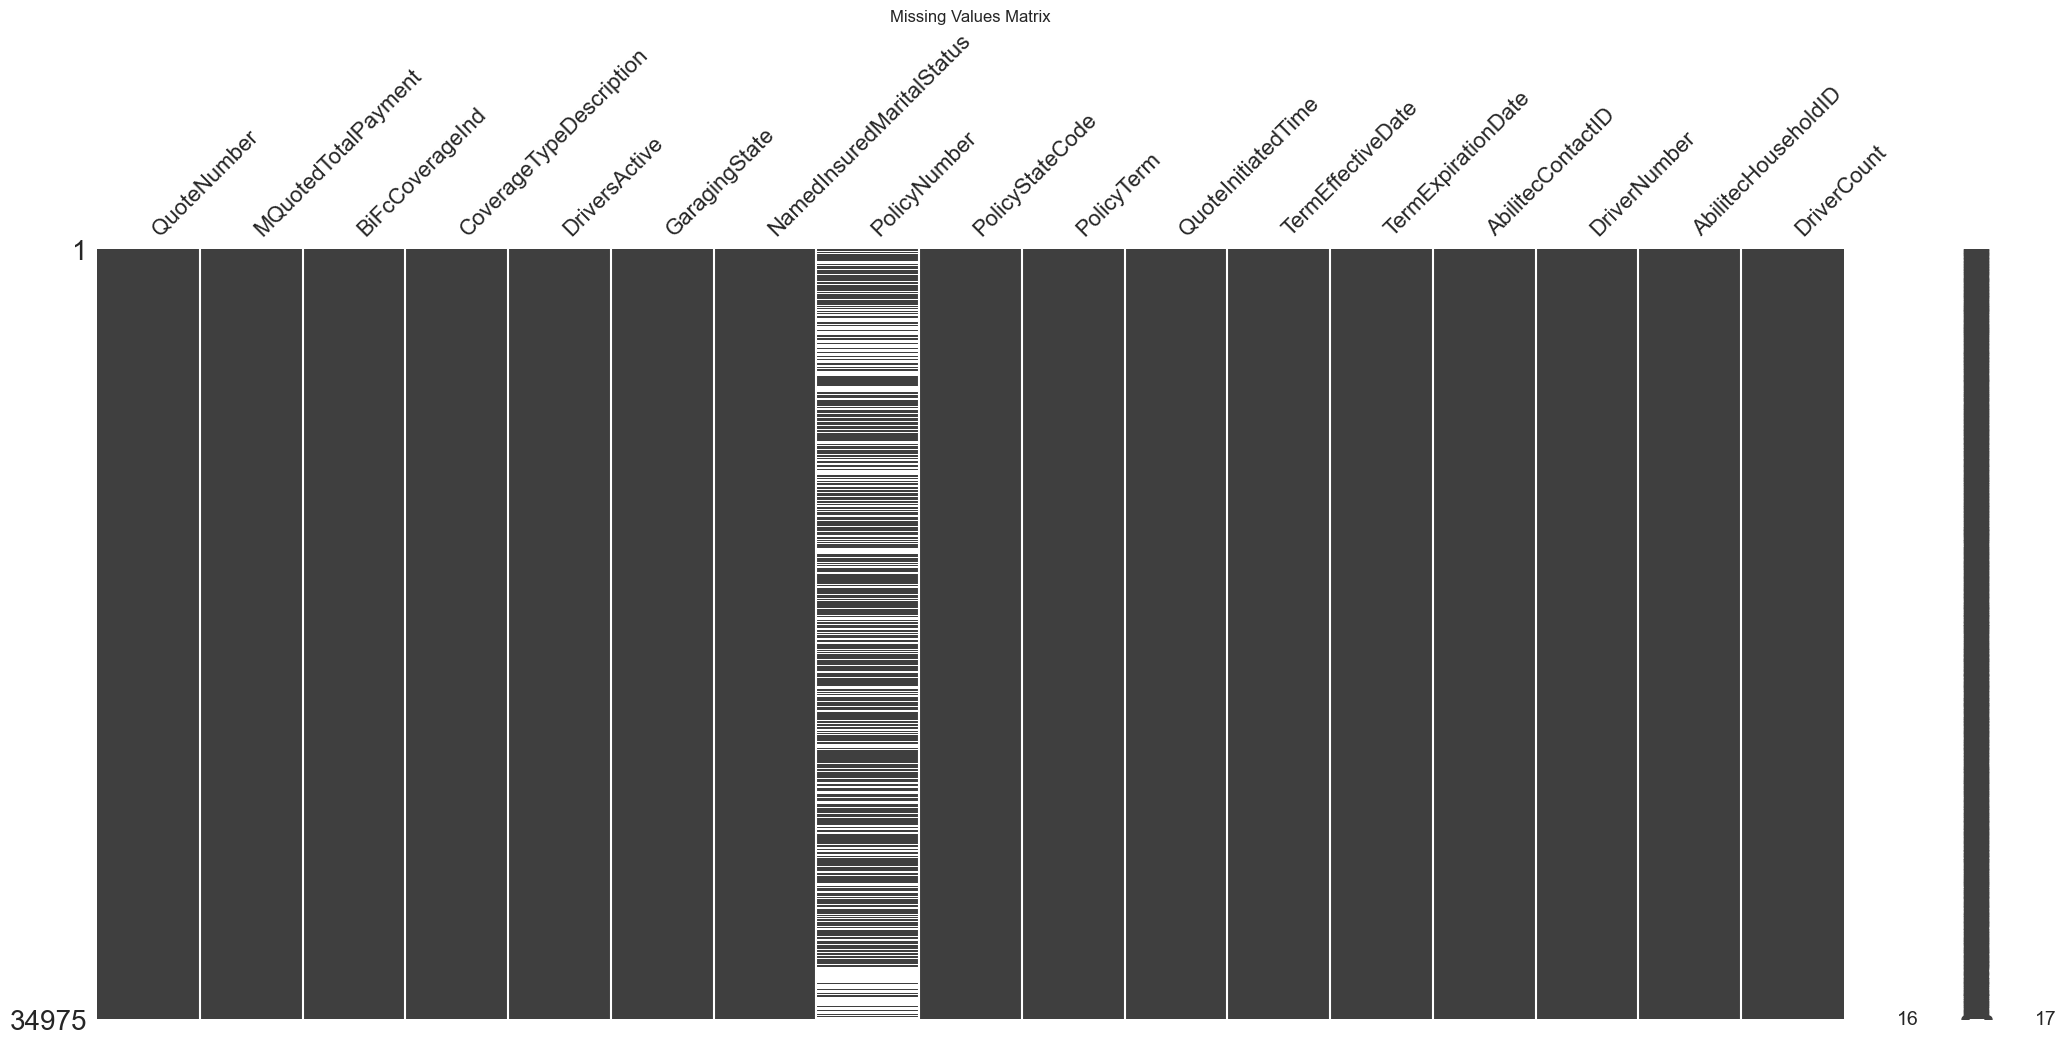

In [9]:
#visulaize missing value matrix for masterquote dataframe
msno.matrix(df_MasterQuote)
plt.title("Missing Values Matrix")
plt.show()

### Brief Summary
* General Dataframe
    * The same rows are missing values from the columns with missing values
    * These rows could be coul dbe looked at to be deleted if 20% of their contents are nan values
    
* MasterQuote Dataframe
    * The only column that is missing values is policy number which would have little to no significance in predicting the Quoted Total Payment

## Descriptive Statistics
* This section will show all descriptive statistics (count, mean, std, min, max, 25%, 50%, 75%) of all numerical variables and statistics such as count, unique, top and most frequent for the categorical variables

### The General Dataframe

This cell will show the numerical feature summary

In [11]:
##Feature summary for numerical features in the general dataframe
print("Numerical Feature Summary:")
df_TheGeneral.describe()

Numerical Feature Summary:


,DriverNumber,DriverCount,ClaimCount,TotalPaid,DriverID,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
count,11069.000000,11069.000000,11069.000000,11069.000000,11069.000000,11069.000000,9780.000000,9780.000000,9780.000000,9780.000000
mean,1.041286,2.792032,1.940826,7706.163453,19.411239,3.287921,11.362372,4270.032683,1.554839,37.316131
std,0.282314,2.440237,1.398869,14093.710283,37.955300,34.400114,12.076882,8629.654146,19.932623,478.382959
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-25.000000,-600.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,2304.350000,1.000000,1.000000,8.000000,1162.785000,0.000000,0.000000
75%,1.000000,4.000000,2.000000,8754.270000,2.000000,2.000000,14.000000,4419.840000,0.000000,0.000000
max,6.000000,34.000000,13.000000,130141.300000,99.000000,998.000000,285.000000,113840.050000,762.000000,18288.000000


This cell will show the categorical feature summary

In [12]:
#feature summary for categorical features in general dataframe
print("Categorical Feature Summary:")
df_TheGeneral.select_dtypes(include='object').describe()

Categorical Feature Summary:


,AbilitecContactID,PolicyNumber,AbilitecHouseholdID,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate
count,11069,11069,11069,11069,11069,11069,11069,11069,11069,10948,11069,11069
unique,7349,7836,7505,11069,5,2,58,2644,54,47,2,2171
top,04ZJUS02EZD0MD68,VkEzMTgwNzgw,04ZJUS03GKGDGL1K,PA0002364104,Insured at fault,C,PG_IVREARENDCV,2018-12-07 00:00:00,OH,OH,NO,2078-12-31 00:00:00
freq,13,13,13,1,4976,10870,1423,32,860,855,9928,225


### MasterQuote Dataframe

This cell will show numerical features summary

In [13]:
##Feature summary for numerical features in the masterquote dataframe
print("Numerical Feature Summary:")
df_MasterQuote.describe()

Numerical Feature Summary:


,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverNumber,DriverCount
count,34975.000000,34975.000000,34975.000000,34975.000000,34975.000000
mean,1554.266786,1.300758,9.799514,1.042831,1.747219
std,1232.290357,0.552171,2.891542,0.243509,1.214019
min,0.000000,1.000000,6.000000,1.000000,1.000000
25%,789.875000,1.000000,6.000000,1.000000,1.000000
50%,1260.000000,1.000000,12.000000,1.000000,1.000000
75%,2015.920000,2.000000,12.000000,1.000000,2.000000
max,18803.000000,6.000000,12.000000,6.000000,15.000000


This cell will show categorical feature summary

In [14]:
#feature summary for categorical features in masterquote dataframe
print("Categorical Feature Summary:")
df_MasterQuote.select_dtypes(include='object').describe()

Categorical Feature Summary:


,QuoteNumber,BiFcCoverageInd,CoverageTypeDescription,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,AbilitecHouseholdID
count,34975,34975,34975,34975,34975,21113,34975,34975,34975,34975,34975,34975
unique,34975,4,3,47,7,21113,47,34437,1230,1381,21119,22449
top,MzM0MDA0OTE=,BI NOFC,Liability Only,OH,Single,T1IyNzE0OTQ0,OH,2019-03-18 23:19:11,2018-11-30 00:00:00,2019-11-30 00:00:00,04ZJUS02NRX4JFSS,04ZJUS0343VBYQQN
freq,1,18580,21016,2525,20366,1,2525,5,235,182,23,23


### Brief Summary
* We can see that the average Quoted Total Payment was 1554.266786.  We can also see that the average drivers active is around 1.
* In the general dataframe, we can see that the average total amount paid was 7706.163453.  

* By looking at the descriptive statistics, we can get a good idea of values to expect for each column in each dataset.  This will come in handy later when assessing values that a model may output.  If the values are similar to the descriptive statistics for that dataframe then the model is in the right direction

## Correlation Analysis
* This will make a heatmap and show possible correlation between numerical features.  This could help us analyze features that are important to the dataframe

This cell will show the heatmap for the general df

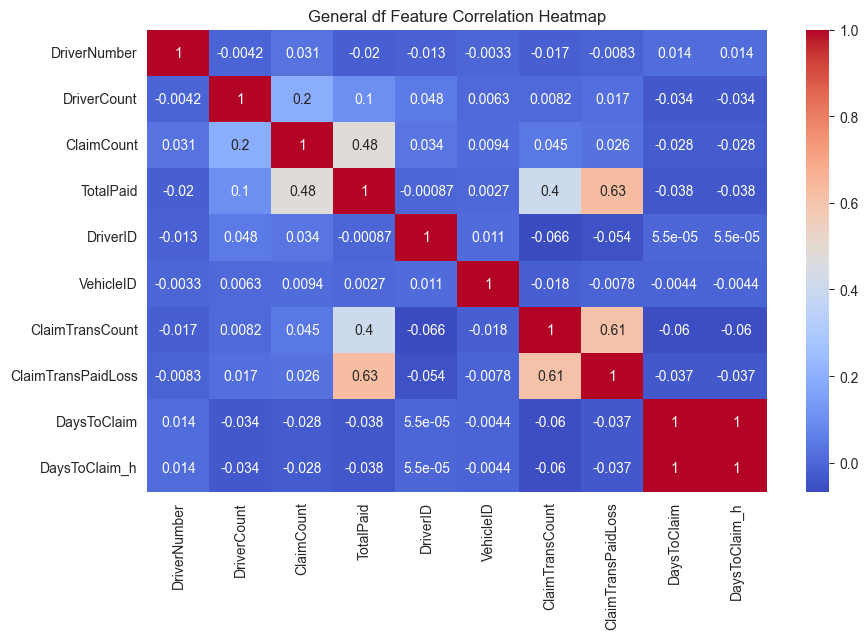

In [17]:
#This will show a correlation analysis and heatmap for the general dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df_TheGeneral.corr(), annot=True, cmap='coolwarm')
plt.title("General df Feature Correlation Heatmap")
plt.show()

This cell will show heatmap for master quote df

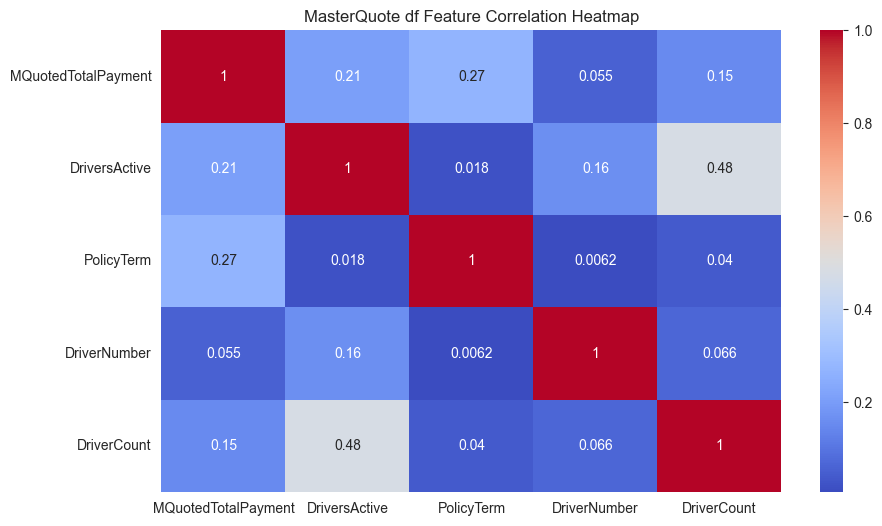

In [18]:
#This will show a heatmap for the Masterquote dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df_MasterQuote.corr(), annot=True, cmap='coolwarm')
plt.title("MasterQuote df Feature Correlation Heatmap")
plt.show()

### Brief Summary
* These heatmaps show correlation between certain features.  There was little to no correlation between features for the MasterQuote.  I did see some correlation between claim trans count and claim trans paid loss in the general dataframe.


## Histogram for Numerical Values
* This will create histograms so that I can assess how each numerical column is skewed.  This will be important so I can assess how the data is skewed

This cell will show histograms for each numerical feature in the general df

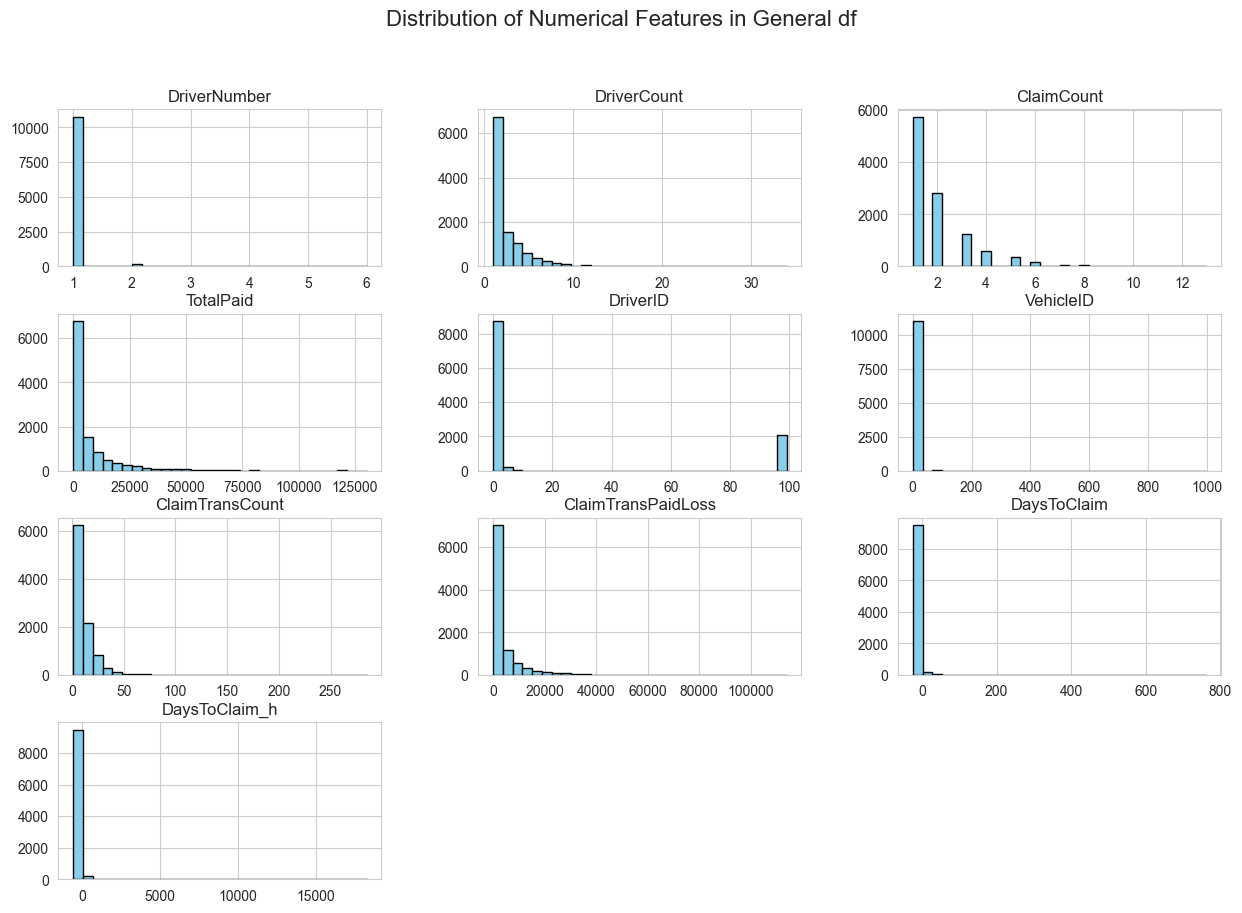

In [20]:
#Histogram for numerical columns in the general dataframe
numerical_columns = df_TheGeneral.select_dtypes(include=['float64', 'int64']).columns

df_TheGeneral[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features in General df', fontsize=16)
plt.show()

This cell will show histograms for each numerical feature in the masterquote df

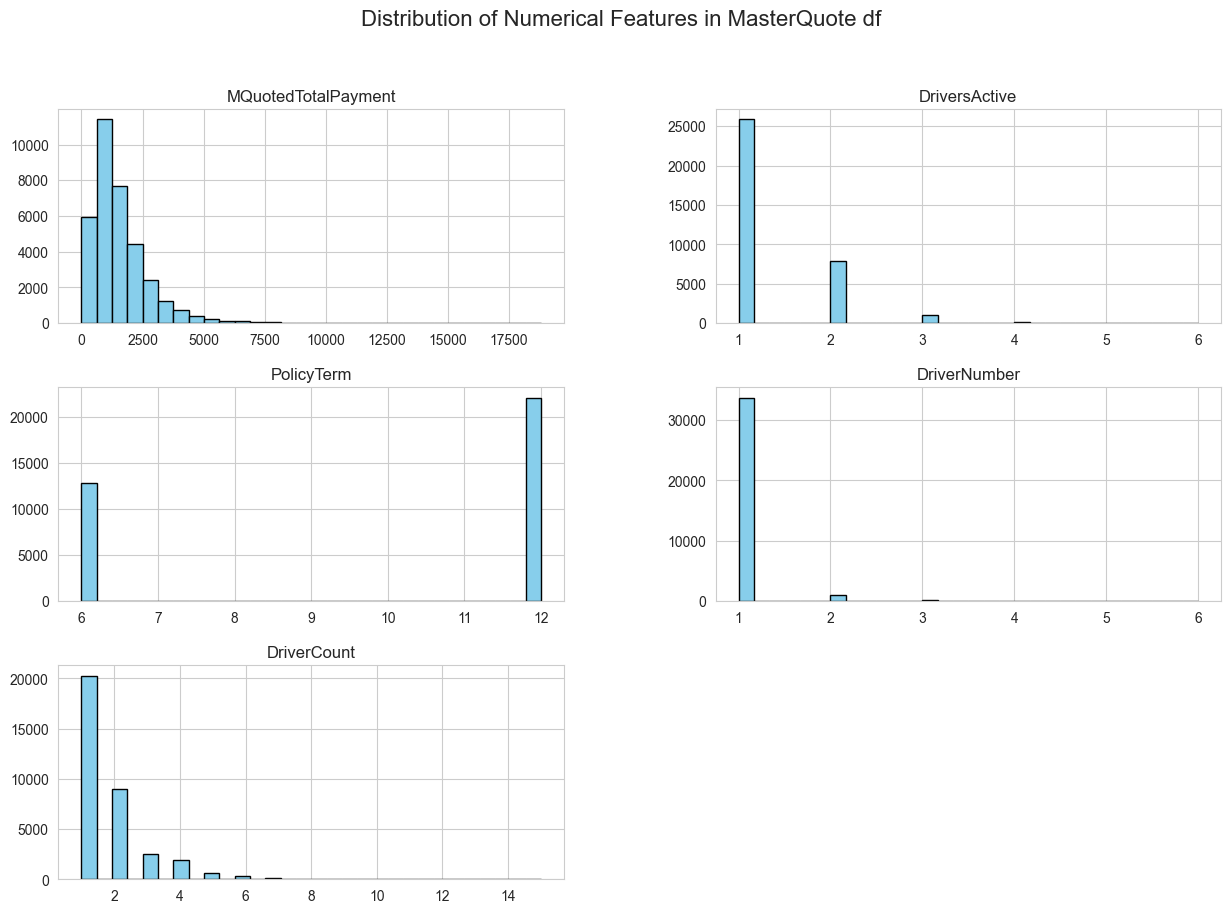

In [21]:
#histogram for numerical columns in the MasterQuote dataframe
numerical_columns = df_MasterQuote.select_dtypes(include=['float64', 'int64']).columns

df_MasterQuote[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features in MasterQuote df', fontsize=16)
plt.show()

### Brief Summary
* We can see that most of the plots for MasterQuote and The General show right skewed. this means that the amounts are lower.

## Boxplot to Assess Outliers
* A box plot will help me visualize outliers so I can see whihc numerical columns have the most outliers
* This iwll help me determine if the information previously gathered in the descriptive statistics section may be skewed

The general df boxplots

In [ ]:
# Filter for numeric columns
numeric_columns = df_TheGeneral.select_dtypes(include=['number']).columns

# Iterate through each numeric column and create a box plot
for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.boxplot(y=df_TheGeneral[column], color='skyblue')  # Boxplot for each column
    plt.title(f'Boxplot for {column}', fontsize=16)  # Add title
    plt.ylabel(column, fontsize=12)  # Label y-axis
    plt.show()

The masterquote df boxplots

In [ ]:
# Filter for numeric columns
numeric_columns = df_MasterQuote.select_dtypes(include=['number']).columns

# Iterate through each numeric column and create a box plot
for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.boxplot(y=df_MasterQuote[column], color='skyblue')  # Boxplot for each column
    plt.title(f'Boxplot for {column}', fontsize=16)  # Add title
    plt.ylabel(column, fontsize=12)  # Label y-axis
    plt.show()

### Brief Summary
* In the general df, total paid, claim trans count, claim trans paid loss, and days to claim have. asignificant amount of outliers. This could be due to a wide distribution within each categorical column

- in the masterquote df, m quoted total payment has a dignificant amount of outliers. This again can be due to the wide distribution of quote payment in the numerical column